In [ ]:
%%capture
! pip install arviz==0.11.00
! pip install pymc3==3.10.0

In [4]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
from pymc3 import math

The mean of the Gaussian is $\mu$ and the standard deviation is $\sigma$. Here, the model parameterizes the Gaussian distribution in terms of the mean and precision, not the mean and variance or the mean and standard deviation. These are all simply related, with the following formula:

$$\lambda = \frac{1}{\sigma^{2}}$$

$$\sigma = \frac{1}{\sqrt{\lambda}}$$

While $\sigma = \lambda$ when $\sigma = 1$,  the precision and standard deviation are inversely related for other values, $\sigma$ being low when $\lambda$ is high, and should not be confused. Here, a precision of 0.001 denotes a very uncertain normal prior. If this value was used as standard deviation, it would create a very narrow distribution that would be a very conservative prior for most models, as new data would barely move the distribution away from the mean.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [std, precision]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [std, precision]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [std, precision]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [std, precision]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.


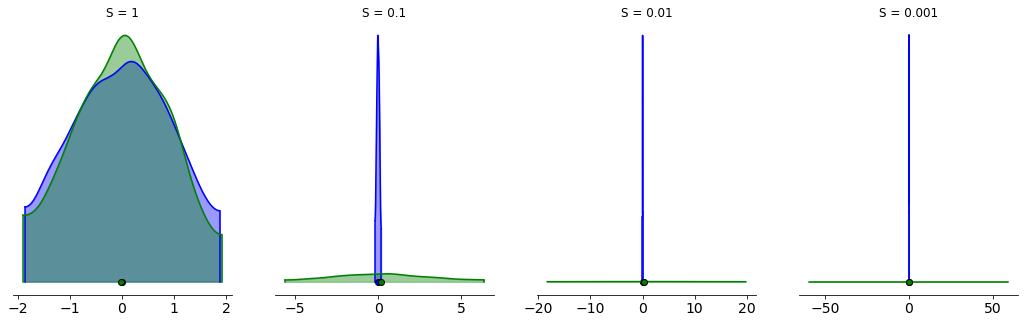

In [16]:
fig, axs = plt.subplots(ncols=4, figsize=(18, 5))
for i, s in enumerate([1, 0.1, 0.01, 0.001]):
    
    with pm.Model():
        precision = pm.Normal("precision", mu=0., tau=s)
        std = pm.Normal("std", mu=0., sigma=s)
        trace = pm.sample(return_inferencedata=True)

    az.plot_density(trace, var_names=['std'], shade=.4, colors='b', ax=axs[i])
    az.plot_density(trace, var_names=['precision'], shade=.4, colors='g', ax=axs[i])
    axs[i].set_title(f'S = {s}')

# The seven scientists problem

This problem is from MacKay (2003, p. 309) where it is, among other things,
treated to a Bayesian solution, but not quite using a graphical modeling approach,
nor relying on computational sampling methods.
Seven scientists with wildly-differing experimental skills all make a measurement
of the same quantity. They get the answers x = {−27.020, 3.570, 8.191, 9.898, 9.603,
9.945, 10.056}. Intuitively, it seems clear that the first two scientists are pretty inept
measurers, and that the true value of the quantity is probably just a bit below 10.
The main problem is to find the posterior distribution over the measured quantity,
telling us what we can infer from the measurement. A secondary problem is to infer
something about the measurement skills of the seven scientists.
The graphical model for one way of solving this problem is shown in the Figure below.
The assumption is that all the scientists have measurements that follow a Gaussian
distribution, but with different standard deviations. However, because they are all
measuring the same quantity, each Gaussian has the same mean, and it is just the
standard deviation that differs.

![title](data/sevenscientists.png)

The mean of the Gaussian is $\mu$ and the standard deviation is $\sigma$. Here, the model parameterizes the Gaussian distribution in terms of the mean and precision, not the mean and variance or the mean and standard deviation. These are all simply related, with the variance being $\sigma^{2}$ and the precision being $\lambda = \frac{1}{\sigma^{2}}$.

In [ ]:
# data
x = np.array([-27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056])

**Exercise 1** Draw posterior samples, and reach conclusions about the value of the measured quantity, and about the accuracies of the seven scientists.

**Exercise 2** Change the graphical model to use a uniform prior
over the standard deviations. Experiment with the
effect the upper bound of this uniform prior has on inference.

## Solutions

The model:
$$ \mu \sim \text{Gaussian}(0, .001)  $$
$$ \lambda_{i} \sim \text{Gamma} (.001, .001)  $$
$$ \sigma = 1/{\sqrt\lambda_{i}} $$  
$$ x_{i} \sim \text{Gaussian} (\mu, \lambda_{i})  $$

The mean is the same for all seven scientists, while the standard deviations are different 

In [4]:
n = len(x)

with pm.Model() as model:

    # prior
    mu = pm.Normal("mu", mu=0., tau=0.001)
    lambda1 = pm.Gamma("lambda1", alpha=0.01, beta=0.01, shape=n)
    sigma = pm.Deterministic('sigma',1 / math.sqrt(lambda1))
    
    # observed
    xi = pm.Normal("xi", mu=mu, tau=lambda1, observed=x)

    # inference
    trace = pm.sample(2000, tune=2000, target_accept=0.9)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda1, mu]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 220 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


In [5]:
az.summary(trace)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,9.858,0.247,9.477,10.205,0.009,0.006,784.0,784.0,2241.0,1179.0,1.0
lambda1[0],0.001,0.001,0.000,0.003,0.000,0.000,6339.0,6328.0,2721.0,1842.0,1.0
lambda1[1],0.026,0.036,0.000,0.093,0.000,0.000,6696.0,6194.0,3055.0,2006.0,1.0
lambda1[2],0.557,4.187,0.000,1.438,0.091,0.064,2120.0,2120.0,2084.0,1757.0,1.0
lambda1[3],31.121,50.056,0.000,117.993,0.697,0.493,5164.0,5164.0,2998.0,2740.0,1.0
lambda1[4],14.675,27.824,0.000,55.723,0.399,0.282,4870.0,4870.0,2402.0,1764.0,1.0
lambda1[5],31.457,52.538,0.000,117.561,0.802,0.567,4290.0,4290.0,2013.0,1976.0,1.0
lambda1[6],24.221,44.482,0.000,94.786,0.635,0.449,4909.0,4909.0,2148.0,1975.0,1.0
sigma[0],755.741,16417.688,10.659,474.651,480.689,339.983,1167.0,1167.0,2721.0,1842.0,1.0
sigma[1],37.149,348.127,1.569,76.662,5.789,4.094,3616.0,3616.0,3055.0,2006.0,1.0


array([[<AxesSubplot:title={'center':'lambda1'}>,
        <AxesSubplot:title={'center':'lambda1'}>]], dtype=object)

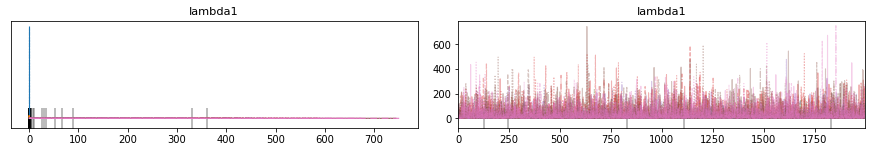

In [9]:
az.plot_trace(trace, var_names=['lambda1'])

# Repeated measurement of IQ

In this example, we consider how to estimate the IQ of a set of people, each of whom
have done multiple IQ tests. The data are the measures xij for the i = 1, . . . , n
people and their j = 1, . . . , m repeated test scores.
We assume that the differences in repeated test scores are distributed as Gaussian
error terms with zero mean and unknown precision. The mean of the Gaussian of
a person’s test scores corresponds to their latent true IQ. This will be different for
each person. The standard deviation of the Gaussians corresponds to the accuracy
of the testing instruments in measuring the one underlying IQ value. We assume
this is the same for every person, since it is conceived as a property of the tests
themselves.
The graphical model for this problem is shown in the figure below. Because we know
quite a bit about the IQ scale, it makes sense to set priors for the mean and standard
deviation using this knowledge. Our first attempt to set priors (these are revisited in
the exercises) simply assume the actual IQ values are equally likely to be anywhere
between 0 and 300, and standard deviations are anywhere between 0 and 100.

![title](data/IQ.png)

In [10]:
y = np.array([[90, 95, 100], [105, 110, 115], [150, 155, 160]])

**Exercise 1** Use the posterior distribution for each person’s μi to estimate their IQ. What can we say about the precision of the IQ test?

**Exercise 2** Now, use a more realistic prior assumption for the μi means. Theoretically, IQ distributions should have a mean of 100, and a standard deviation of 15. Make this change in the script, and re-run the inference. How do the estimates of IQ given by the means change? Why?

**Exercise 3** Repeat both of the above stages (i.e., using both priors on $\mu$)
with a new, but closely related, data set that has scores of (94, 95, 96), (109,
110, 111), and (154, 155, 156). How do the different prior assumptions affect
IQ estimation for these data. Why does it not follow the same pattern as the
previous data?

## Solution

The model:
$$ \mu_{i} \sim \text{Uniform}(0, 300)  $$
$$ \sigma \sim \text{Uniform} (0, 100)  $$
$$ x_{ij} \sim \text{Gaussian} (\mu_{i}, \frac{1}{\sigma^2})  $$

Data Come From Gaussians With Different Means But Common Precision

In [ ]:
# Data
y = np.array([[90, 95, 100], [105, 110, 115], [150, 155, 160]])
ntest = 3
nsbj = 3

with pm.Model() as model2:
    # mu_i ~ Uniform(0, 300)
    # notices the shape here need to be properly
    # initualized to have the right repeated measure
    mui = pm.Uniform("mui", 0., 300., shape=(nsbj, 1))

    # sg ~ Uniform(0, 100)
    # sg = pm.Uniform('sg', .0, 100)

    # It is more stable to use a Gamma prior
    lambda1 = pm.Gamma("lambda1", alpha=0.01, beta=0.01)
    sg = pm.Deterministic("sg", 1 / np.sqrt(lambda1))

    # y ~ Normal(mu_i, sg)
    yd = pm.Normal("y", mu=mui, sd=sg, observed=y)

    trace3 = pm.sample(init="adapt_diag")

idata3 = az.from_pymc3(trace3)
az.summary(idata3)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
